In [6]:
#Series multiindex
import pandas as pd
letters = list('ABC')
num = list(range(10))

mi = pd.MultiIndex.from_product([letters, num])
s = pd.Series(np.random.rand(30),index = mi)
s

A  0    0.962674
   1    0.990218
   2    0.341259
   3    0.546090
   4    0.757549
   5    0.025369
   6    0.436768
   7    0.859460
   8    0.981323
   9    0.626609
B  0    0.918862
   1    0.653182
   2    0.645022
   3    0.584446
   4    0.940976
   5    0.045530
   6    0.882353
   7    0.654839
   8    0.614002
   9    0.236777
C  0    0.363848
   1    0.544349
   2    0.163805
   3    0.343871
   4    0.429446
   5    0.436060
   6    0.111988
   7    0.488837
   8    0.003351
   9    0.232742
dtype: float64

In [7]:
# multiindex query
s.loc[:,[1,3,6]]

A  1    0.990218
   3    0.546090
   6    0.436768
B  1    0.653182
   3    0.584446
   6    0.882353
C  1    0.544349
   3    0.343871
   6    0.111988
dtype: float64

In [9]:
# multiindex slice
s.loc[pd.IndexSlice[:'B',5:]]

A  5    0.025369
   6    0.436768
   7    0.859460
   8    0.981323
   9    0.626609
B  5    0.045530
   6    0.882353
   7    0.654839
   8    0.614002
   9    0.236777
dtype: float64

In [14]:
# create dataframe from multiindex 
frame = pd.DataFrame(np.arange(12).reshape(6,2),
                    index =[list('AAABBB'),list('123123')],
                    columns = ['hello','shiyanlou'])
frame

hello  shiyanlou
A 1      0          1
  2      2          3
  3      4          5
B 1      6          7
  2      8          9
  3     10         11

In [15]:
# index name
frame.index.names = ['first','second']
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

In [16]:
frame.groupby('first').sum()

,hello,shiyanlou
first,,
A,6,9
B,24,27


In [20]:
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

In [23]:
# reverse pivot
frame.stack()

first  second           
A      1       hello         0
               shiyanlou     1
       2       hello         2
               shiyanlou     3
       3       hello         4
               shiyanlou     5
B      1       hello         6
               shiyanlou     7
       2       hello         8
               shiyanlou     9
       3       hello        10
               shiyanlou    11
dtype: int32

In [28]:
# pivot
frame.unstack()

hello        shiyanlou       
second     1  2   3         1  2   3
first                               
A          0  2   4         1  3   5
B          6  8  10         7  9  11

In [29]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

In [32]:
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


In [30]:
# column query
df[df['age']>3]

,age,animal,priority,visits
e,5.0,dog,no,2
g,4.5,snake,no,1
i,7.0,dog,no,2


In [31]:
# query by indexlabel
df.iloc[2:4,1:3]

,animal,priority
c,snake,no
d,dog,yes


In [36]:
# multi query with label
df[(df['age']<3) & (df['animal']=='cat')]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


In [37]:
df[(df['age']<3) | (df['animal']=='cat')]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
f,2.0,cat,no,3
h,NaN,cat,yes,1


In [38]:
df[df['animal'].isin(['cat','dog'])]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


In [39]:
# query by label and column
df.loc[df.index[[3,4,8]],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [40]:
# sort by multi column
df.sort_values(by=['age','visits'],ascending=[False,True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,2.0,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


In [48]:
# multi replace
df['priority'].map({'yes':True,'no':False})

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

In [49]:
# group by 
df.groupby('animal').sum()

,age,visits
animal,,
cat,7.5,8
dog,15.0,8
snake,5.0,3


In [50]:
temp_df1 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 1
temp_df2 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 2
temp_df3 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 3

print(temp_df1)
print(temp_df2)
print(temp_df3)

          0         1         2         3
0  1.156657 -0.418853  1.497869 -0.959703
1  0.059012  0.170403 -0.508222 -0.069899
2  0.394820  2.176143  0.730438  1.964225
3  0.481257 -0.351378  1.052109  0.402062
4 -0.825485 -0.663279  0.778993  0.052416
          0         1         2         3
0 -1.663631  0.623560  0.637190 -0.295075
1  0.296013 -0.468425 -2.978174 -1.606009
2 -1.178085 -0.979467  1.356544 -0.454599
3 -0.195625 -0.764864  0.076572  0.531420
4  0.211693 -0.342826 -1.707714 -0.199465
          0         1         2         3
0  1.449206  0.349640  1.028406  0.837105
1 -1.780990 -0.119379  1.520293  0.996479
2 -0.630868  0.416927 -0.396068  0.540009
3 -0.295616 -0.916915  0.180073 -0.330980
4  2.538480  1.540039 -0.121598  0.235775


In [51]:
# merge multi tables
pieces = [temp_df1, temp_df2, temp_df3]
pd.concat(pieces)

,0,1,2,3
0,1.156657,-0.418853,1.497869,-0.959703
1,0.059012,0.170403,-0.508222,-0.069899
2,0.394820,2.176143,0.730438,1.964225
3,0.481257,-0.351378,1.052109,0.402062
4,-0.825485,-0.663279,0.778993,0.052416
0,-1.663631,0.623560,0.637190,-0.295075
1,0.296013,-0.468425,-2.978174,-1.606009
2,-1.178085,-0.979467,1.356544,-0.454599
3,-0.195625,-0.764864,0.076572,0.531420
4,0.211693,-0.342826,-1.707714,-0.199465


In [52]:
# find min(sum(column))
df = pd.DataFrame(np.random.random(size=(5,10)),columns=list('abcdefghij'))
print(df)
df.sum().idxmin()
# idxmax(),idxmain() return the index of max, min

          a         b         c         d         e         f         g  \
0  0.974103  0.575389  0.045429  0.008099  0.536737  0.034830  0.665824   
1  0.186627  0.782040  0.896841  0.333407  0.739383  0.323334  0.110796   
2  0.108136  0.995746  0.245277  0.548949  0.769085  0.963061  0.970027   
3  0.402997  0.730668  0.287293  0.424735  0.912043  0.762010  0.236166   
4  0.701023  0.583940  0.075221  0.756219  0.493171  0.456324  0.756624   

          h         i         j  
0  0.708508  0.076418  0.044681  
1  0.652685  0.608394  0.629812  
2  0.369111  0.206007  0.033285  
3  0.024126  0.015587  0.349160  
4  0.478348  0.065311  0.092588  


'i'

In [55]:
# every element sub the avg of row
df = pd.DataFrame(np.random.random(size=(5,3)))
print(df)
df.sub(df.mean(axis = 1),axis = 0)
#df.sub(other,...)

          0         1         2
0  0.291942  0.822539  0.232165
1  0.838049  0.468856  0.184384
2  0.563307  0.816310  0.960217
3  0.274636  0.811421  0.830810
4  0.455932  0.810009  0.553897


,0,1,2
0,-0.156940,0.373657,-0.216717
1,0.340953,-0.028241,-0.312712
2,-0.216638,0.036366,0.180272
3,-0.364320,0.172465,0.191854
4,-0.150681,0.203396,-0.052716


In [59]:
# group by and sum the largest 3 num
df1 = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df1)
df1.groupby('A')['B'].nlargest(3).sum(level =0)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87


A
a    409
b    156
c    345
Name: B, dtype: int64

In [67]:
# create new table , pivot 'A','B','C'
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                'B' : ['A', 'B', 'C'] * 4,
                'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                'D' : np.random.randn(12),
                'E' : np.random.randn(12)})
print(df)

        A  B    C         D         E
0     one  A  foo  0.333262  0.953721
1     one  B  foo  1.891606 -0.513942
2     two  C  foo  1.198397 -0.829551
3   three  A  bar  0.588475  0.110204
4     one  B  bar -0.221152  0.365207
5     one  C  bar -1.852378  1.154735
6     two  A  foo  1.893813  0.686341
7   three  B  foo  0.105125 -2.187742
8     one  C  foo  0.405451 -0.327265
9     one  A  bar -0.047313 -0.814261
10    two  B  bar -0.229342  0.874299
11  three  C  bar -0.319226 -0.027111


In [69]:
# index with A,B
pd.pivot_table(df,index=['A','B'])

D         E
A     B                    
one   A  0.142975  0.069730
      B  0.835227 -0.074368
      C -0.723463  0.413735
three A  0.588475  0.110204
      B  0.105125 -2.187742
      C -0.319226 -0.027111
two   A  1.893813  0.686341
      B -0.229342  0.874299
      C  1.198397 -0.829551

In [70]:
# index with A,B,values with D,avg is default
pd.pivot_table(df,values=['D'],index=['A','B'])

D
A     B          
one   A  0.142975
      B  0.835227
      C -0.723463
three A  0.588475
      B  0.105125
      C -0.319226
two   A  1.893813
      B -0.229342
      C  1.198397

In [72]:
pd.pivot_table(df,values=['D'],index=['A','B'],aggfunc=[np.sum,len])

sum  len
                D    D
A     B               
one   A  0.285949  2.0
      B  1.670454  2.0
      C -1.446926  2.0
three A  0.588475  1.0
      B  0.105125  1.0
      C -0.319226  1.0
two   A  1.893813  1.0
      B -0.229342  1.0
      C  1.198397  1.0

In [74]:
# pivot with A,B, values with D.sum, C is also need
pd.pivot_table(df, values=['D'], index=['A','B'],aggfunc=np.sum,columns=['C'])

D          
C             bar       foo
A     B                    
one   A -0.047313  0.333262
      B -0.221152  1.891606
      C -1.852378  0.405451
three A  0.588475       NaN
      B       NaN  0.105125
      C -0.319226       NaN
two   A       NaN  1.893813
      B -0.229342       NaN
      C       NaN  1.198397

In [80]:
# fill_value
pd.pivot_table(df,values=['D'],index=('A','B'),columns=['C'],aggfunc=np.sum,fill_value=0)

D          
C             bar       foo
A     B                    
one   A -0.047313  0.333262
      B -0.221152  1.891606
      C -1.852378  0.405451
three A  0.588475  0.000000
      B  0.000000  0.105125
      C -0.319226  0.000000
two   A  0.000000  1.893813
      B -0.229342  0.000000
      C  0.000000  1.198397

In [81]:
# absulte num绝对类型
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df['grade'] = df['raw_grade'].astype('category')
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [82]:
df['grade'].cat.categories = ['very good', 'good','very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [83]:
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [84]:
df.sort_values('grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [87]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [108]:
# clean 
#FightNumber 缺省值按照规律进行增长
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10035, np.nan, 10065, np.nan, 10091],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10035,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10050,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10078,Budapest_PaRis,[13]
4,"""Swiss Air""",10091,Brussels_londOn,"[67, 32]"


In [109]:
temp = df.From_To.str.split('_',expand=True)
temp.columns=['From','To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [110]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

In [111]:
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [112]:
df = df.drop('From_To',axis =1).join(temp)
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM(!),10035,"[23, 47]",London,Paris
1,<Air France> (12),10050,[],Madrid,Milan
2,(British Airways. ),10065,"[24, 43, 87]",London,Stockholm
3,12. Air France,10078,[13],Budapest,Paris
4,"""Swiss Air""",10091,"[67, 32]",Brussels,London


In [113]:
df['Airline'] = df['Airline'].str.extract('([\w\s]+)',expand=False).str.strip()
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM,10035,"[23, 47]",London,Paris
1,Air France,10050,[],Madrid,Milan
2,British Airways,10065,"[24, 43, 87]",London,Stockholm
3,12,10078,[13],Budapest,Paris
4,Swiss Air,10091,"[67, 32]",Brussels,London


In [115]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays',axis=1).join(delays)
df

,Airline,FlightNumber,From,To,delay_1,delay_2,delay_3
0,KLM,10035,London,Paris,23.0,47.0,NaN
1,Air France,10050,Madrid,Milan,NaN,NaN,NaN
2,British Airways,10065,London,Stockholm,24.0,43.0,87.0
3,12,10078,Budapest,Paris,13.0,NaN,NaN
4,Swiss Air,10091,Brussels,London,67.0,32.0,NaN


In [117]:
df1 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10035, np.nan, 10065, np.nan, 10091],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df1['FlightNumber'] = df1['FlightNumber'].interpolate().astype(int)
delays1 = df1['RecentDelays'].apply(pd.Series)

In [118]:
delays1

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [122]:
delays1.columns = ['delays1_{}'.format(n) for n in range(1,len(delays.columns)+1)]
delays1

,delays1_1,delays1_2,delays1_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [127]:
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})

In [128]:
df

,grades,name
0,58,Alice
1,83,Bob
2,79,Candy
3,65,Dany
4,93,Ella
5,45,Frank
6,61,Grace
7,88,Jenny


In [129]:
def choice(x):
    if x>60:
        return 1
    else:
        return 0
df.grades= pd.Series(map(lambda x:choice(x),df.grades))
df

,grades,name
0,0,Alice
1,1,Bob
2,1,Candy
3,1,Dany
4,1,Ella
5,0,Frank
6,1,Grace
7,1,Jenny


In [130]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


#### 96. 数据归一化
有时候，DataFrame 中不同列之间的数据差距太大，需要对其进行归一化处理。
其中，Max-Min 归一化是简单而常见的一种方式，公式如下:

$$Y=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [131]:
def normalization(df):
    numerator=df.sub(df.min())
    denominator=(df.max()).sub(df.min())
    Y=numerator.div(denominator)
    return Y
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
normalization(df)

          0         1         2
0  0.249293  0.472350  0.812087
1  0.458116  0.407456  0.635182
2  0.483566  0.808211  0.347392
3  0.105771  0.884806  0.508657
4  0.158311  0.002764  0.146230


,0,1,2
0,0.379893,0.532385,1.000000
1,0.932636,0.458813,0.734320
2,1.000000,0.913162,0.302110
3,0.000000,1.000000,0.544301
4,0.139069,0.000000,0.000000


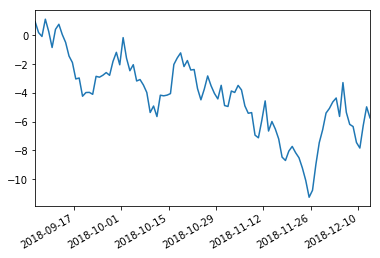

In [132]:
%matplotlib inline
ts = pd.Series(np.random.randn(100), index=pd.date_range('today', periods=100))
ts = ts.cumsum()
ts.plot()

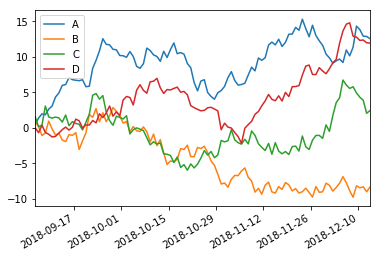

In [133]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

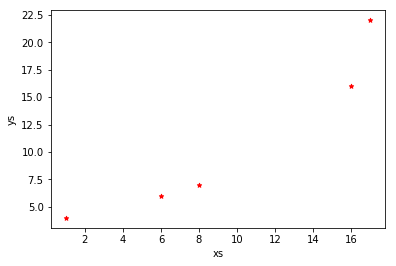

In [143]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df = df.cumsum()
df.plot.scatter("xs","ys",color='red',marker="*")

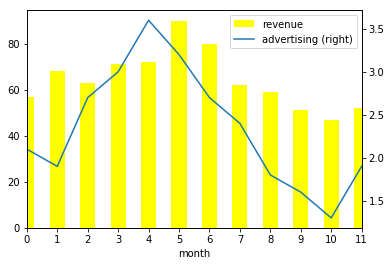

In [135]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "yellow")
df.plot("month", "advertising", secondary_y = True, ax = ax)